year                       0
per capita income (US$)    0
dtype: int64
Predicted per capita income for Canada in 2020: $41288.69


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


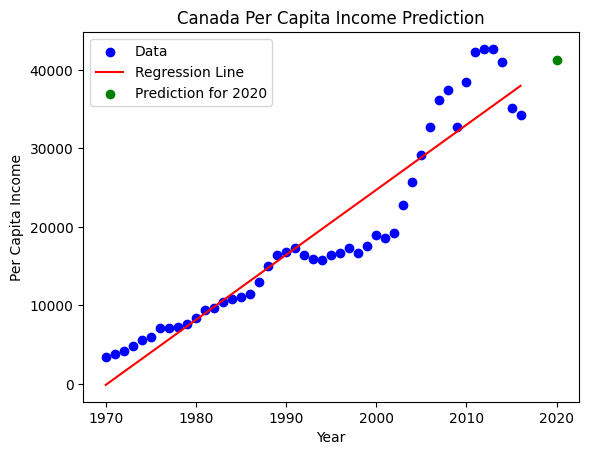

In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/content/sample_data/canada_per_capita_income.csv')

# Step 2: Data preprocessing
# Checking for any missing values or cleaning if necessary
print(data.isnull().sum())  # To check for any missing values

# Assuming the data has columns "Year" and "PerCapitaIncome"
# If there are any missing values, you can fill them or drop rows accordingly
data.dropna(inplace=True)

# Step 3: Train a regression model
X = data[['year']]
y = data['per capita income (US$)']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict the per capita income for the year 2020
year_2020 = np.array([[2020]])
predicted_income = model.predict(year_2020)

print(f"Predicted per capita income for Canada in 2020: ${predicted_income[0]:.2f}")

# Step 5: (Optional) Visualizing the data and prediction
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(2020, predicted_income, color='green', label='Prediction for 2020')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.title('Canada Per Capita Income Prediction')
plt.legend()
plt.show()


YearsExperience    2
Salary             0
dtype: int64
Predicted salary for an employee with 12 years of experience: $139980.89


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


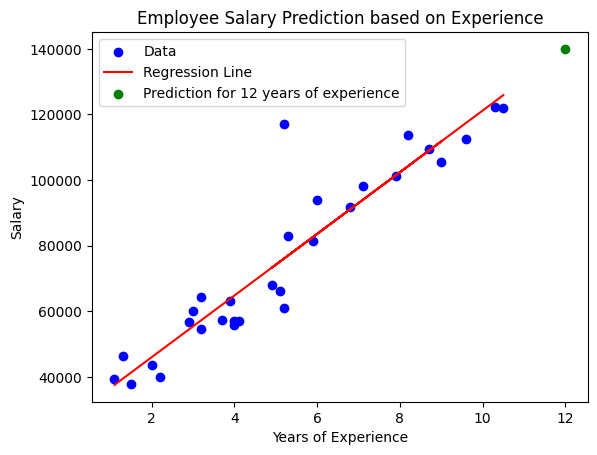

In [26]:
# Step 1: Load the dataset for Salary prediction
salary_data = pd.read_csv('/content/sample_data/salary.csv')

# Step 2: Data preprocessing
print(salary_data.isnull().sum())

# Assuming the data has columns "YearsExperience" and "Salary"
# salary_data.dropna(inplace=True)
salary_data.fillna(salary_data['YearsExperience'].mean(), inplace=True)


# Step 3: Train a regression model
X_salary = salary_data[['YearsExperience']]
y_salary = salary_data['Salary']

# Initialize and fit the model
salary_model = LinearRegression()
salary_model.fit(X_salary, y_salary)

# Step 4: Predict the salary for an employee with 12 years of experience
years_of_experience = np.array([[12]])
predicted_salary = salary_model.predict(years_of_experience)

print(f"Predicted salary for an employee with 12 years of experience: ${predicted_salary[0]:.2f}")

# Step 5: Visualizing the data and prediction
plt.scatter(X_salary, y_salary, color='blue', label='Data')
plt.plot(X_salary, salary_model.predict(X_salary), color='red', label='Regression Line')
plt.scatter(12, predicted_salary, color='green', label='Prediction for 12 years of experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Employee Salary Prediction based on Experience')
plt.legend()
plt.show()


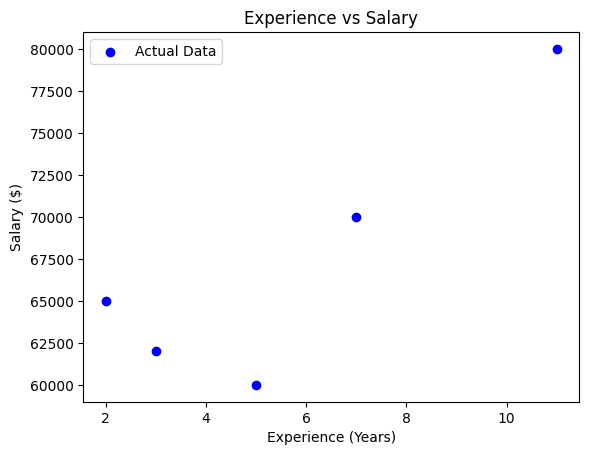

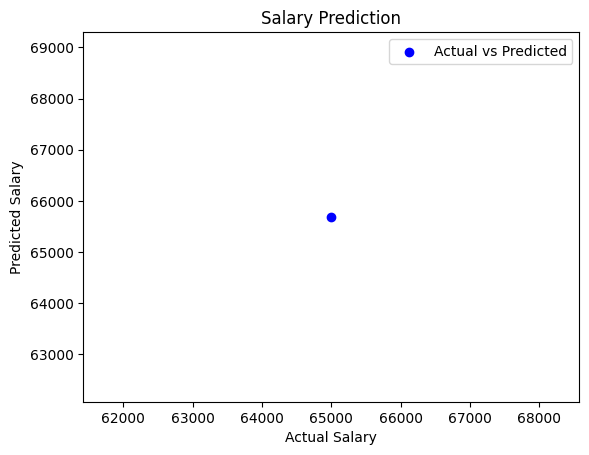

Coefficients: [2687.5 2125.  1750. ]
Intercept: 21562.500000000022
Predicted salary for 2 yrs experience, 9 test score, 6 interview score: 56562.50 US$
Predicted salary for 12 yrs experience, 10 test score, 10 interview score: 92562.50 US$
Mean Absolute Error (MAE): 687.50
Mean Squared Error (MSE): 472656.25
R-squared (R2) Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("/content/sample_data/hiring.csv")

# Function to convert experience from words to numbers
def convert_experience(value):
    word_to_num = {"zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6,
                   "seven": 7, "eight": 8, "nine": 9, "ten": 10, "eleven": 11, "twelve": 12}
    return word_to_num.get(value.lower(), value) if isinstance(value, str) else value

# Apply conversion
data['experience'] = data['experience'].apply(convert_experience)

# Handle missing values by removing rows with NaN
data = data.dropna()

# Convert all columns to numeric
data = data.astype(float)

# Distribution plot visualization
plt.scatter(data['experience'], data['salary($)'], color='blue', label='Actual Data')
plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($)")
plt.title("Experience vs Salary")
plt.legend()
plt.show()

# Relationship between variables
X = data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = data['salary($)']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the results
y_pred = model.predict(X_test)

# Visualize prediction
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Salary Prediction")
plt.legend()
plt.show()

# Check values of coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Predict salary for given candidates
candidates = np.array([[2, 9, 6], [12, 10, 10]])
salary_predictions = model.predict(candidates)
print(f"Predicted salary for 2 yrs experience, 9 test score, 6 interview score: {salary_predictions[0]:.2f} US$")
print(f"Predicted salary for 12 yrs experience, 10 test score, 10 interview score: {salary_predictions[1]:.2f} US$")

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


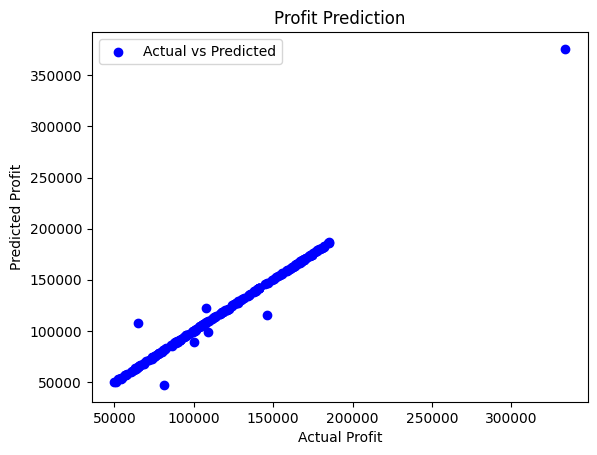

Coefficients: [ 5.33045605e-01  1.13893831e+00  8.30755037e-02 -8.74491486e+02
 -9.71337988e+01]
Intercept: -82439.15560711118
Predicted profit for given candidate: 554066.30 US$
Mean Absolute Error (MAE): 1404.44
Mean Squared Error (MSE): 30775142.86
R-squared (R2) Score: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("/content/sample_data/1000_Companies.csv")

# Handle missing values by removing rows with NaN
data = data.dropna()

# Encode categorical variable (State) using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
state_encoded = encoder.fit_transform(data[['State']])
state_encoded_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['State']))

# Concatenate encoded state data with original dataset
data = pd.concat([data.drop(['State'], axis=1), state_encoded_df], axis=1)

# Define independent (X) and dependent (y) variables
X = data[['R&D Spend', 'Administration', 'Marketing Spend'] + list(state_encoded_df.columns)]
y = data['Profit']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the results
y_pred = model.predict(X_test)

# Visualize prediction
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Profit Prediction")
plt.legend()
plt.show()

# Check values of coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Predict profit for given candidate dynamically
state_names = encoder.get_feature_names_out(['State'])
florida_encoded = (state_names == "State_Florida").astype(int)
candidate_features = np.array([91694.48, 515841.3, 11931.24] + list(florida_encoded)).reshape(1, -1)
profit_prediction = model.predict(candidate_features)
print(f"Predicted profit for given candidate: {profit_prediction[0]:.2f} US$")

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

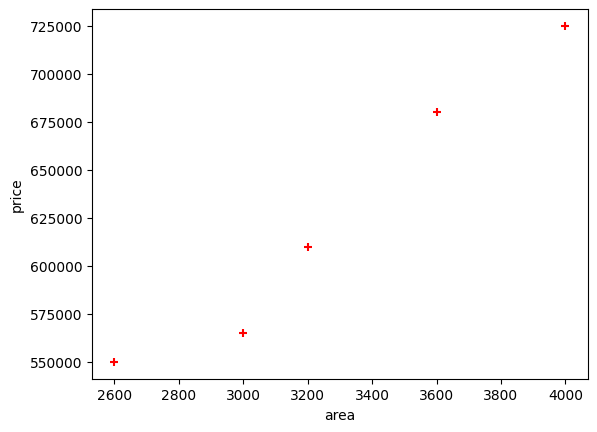

In [59]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/housing_area_price.csv')

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_

"""Y = m * X + b (m is coefficient and b is intercept)"""

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])

In [61]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('/content/sample_data/homeprices_Multiple_LR.csv')

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])